# Compositionality and rarefaction
Amplicon data is relative, AKA compositional. The number of reads for a given taxa in a given sample is in itself arbitrary and can only be interpreted relative to the rest of the taxa in the sample. Unless you have some quantitative measure on microbial cells for your samples, for example by qPCR, flow cytometry, or an added reference culture, this compositional nature of the data has to be accounted for in the analysis. 

The issue of varying read depth (AKA library size) in different samples gives rise to two separate problems:
### 1) Abundance estimation
##### 1.1) The problem with relative data
Let's assume 200 reads are assigned to taxa A in a sample 1 and 200 reads are assigned to taxa A in sample 2. Taxa A is not necessarily equally abundant in these two samples, unless the read depth is similar in the two samples. The easy solution to this problem is to normalize (for example divide by) the total read depth of the sample. However, a taxa assigned to 10 out of 1000 reads has a relative abundance of 1%. A taxa assigned to 100 reads out of 10000 reads has a relative abundance of 1%. The first measure is much more prone to noise due to lower counts. 
##### 1.2) The problem with count data
Variance increases with the number of read counts (AKA heteroscdasticity), which is a problem for common statistical analysis (see notebook Statistics 101).

### 2) Detection threshold
We will almost never detect all taxa in a given sample; if they are too rare they will go undetected. Samples with higher read depth will be more likely to include the rare taxa. Therefore, especially if we are interested in the presence/absence of certain taxa, varying read depth across samples can have a large impact.

## Rarefaction curves
A rarefaction curve is a way to estimate how much of the diversity in a sample you have captured. The idea is straightforward: Take random subsamples of reads from your sample and calculate the diversity in this subsample, while you increase the number of reads you subsample the diversity increases, and if it at some point reaches a platau (before you run out of reads) we can to some extend assume that the diversity in the sample is covered.

### Let's try it out in R:

In [2]:
# Load phyloseq object
library(phyloseq)
library(ggplot2)
load("physeq.RData")

We use a function from the MicEco package to calculate the curves

In [3]:
library(MicEco)
rc_data <- rcurve(phy, subsamp = seq(from = 1000, to = 50000, by = 1000))

Warning message:
"package 'MicEco' was built under R version 3.6.2"

  |======                                                                |   8%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=======                                                               |  10%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |========                                                              |  12%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==========                                                            |  14%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===========                                                           |  16%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=============                                                         |  18%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==============                                                        |  20%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===============                                                       |  22%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=================                                                     |  24%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==================                                                    |  26%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |====================                                                  |  28%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=====================                                                 |  30%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |======================                                                |  32%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |========================                                              |  34%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=========================                                             |  36%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===========================                                           |  38%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |============================                                          |  40%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=============================                                         |  42%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===============================                                       |  44%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |================================                                      |  46%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==================================                                    |  48%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===================================                                   |  50%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |====================================                                  |  52%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |======================================                                |  54%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=======================================                               |  56%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=========================================                             |  58%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==========================================                            |  60%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===========================================                           |  62%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=============================================                         |  64%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==============================================                        |  66%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |================================================                      |  68%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=================================================                     |  70%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==================================================                    |  72%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |====================================================                  |  74%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=====================================================                 |  76%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=======================================================               |  78%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |========================================================              |  80%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |=========================================================             |  82%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===========================================================           |  84%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |============================================================          |  86%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==============================================================        |  88%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===============================================================       |  90%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |================================================================      |  92%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |==================================================================    |  94%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===================================================================   |  96%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |===================================================================== |  98%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

  |======================================================================| 100%

Warning message in vegan::rarefy(otu, sample = subsamp[i], MARGIN = 2):
"requested 'sample' was larger than smallest site maximum (3910)"

In this plot below, each sample is a line. We do see that most samples seem to reach a platau, however, some are still rising until the end. The lines end at different number of reads due to their varying read depth

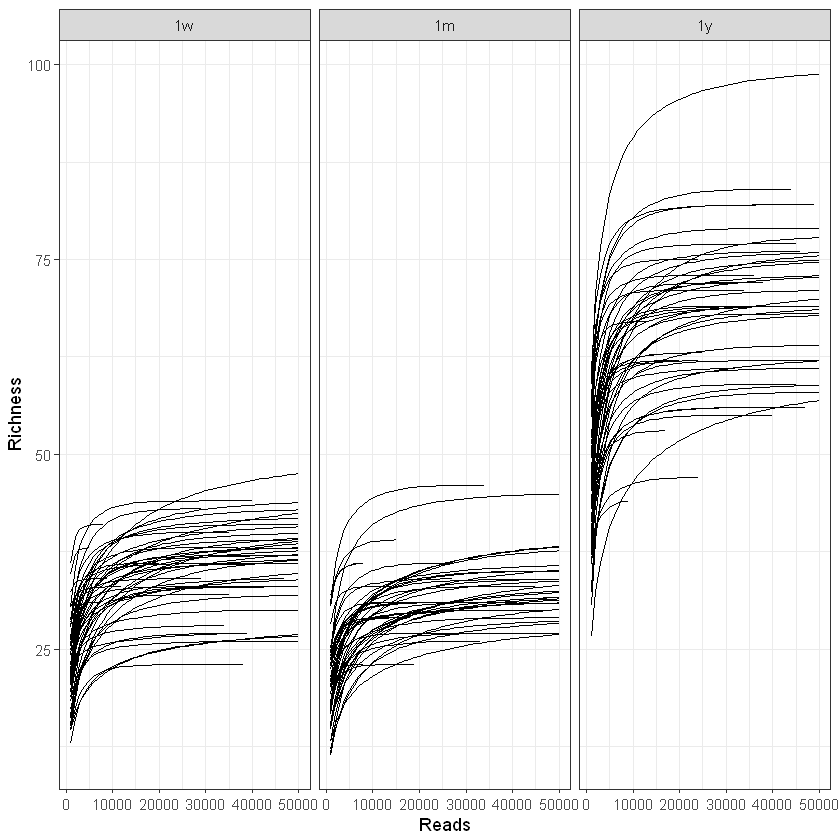

In [4]:
ggplot(rc_data, aes(Reads, Richness, group = Sample)) +
    theme_bw() +
    geom_line() +
    facet_grid(~Time)

## How to solve the problems
### For presence/absence analysis (for example alpha diversity)
There are overall two solutions to this problem:
* 1) Rarefy data
* 2) Include read depth in statistical analysis

### For relative abundance analysis (for example beta diversity, differential abundance)
There are overall three solutions to this problem:
* 1) Rarefy data
* 2) Include read depth in statistical analysis
* 3) Compositional normalization


### 1) Rarefy data
Rarefying data is very popular in the literature and is a way to normalize the data. Basically, you choose a common read depth across all samples. All samples that have fewer reads than this threshold are thrown away. For all samples that have more reads than the threshold you randomly subsample the chosen common read depth (as with the rarefaction curve above). 

**Advantages:** Simple. "Solves" both the presence/absence and relative abundance problems stated above.

**Disadvantages:** Removing valuable data. Relative abundances become less precise (as per 1.2 above). Producing false zeroes: After rarefying some taxa are suddenly not present in a sample anymore, because the reads were removed, even though these taxa were actually detected. [There are strong opponents against rarefying data](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003531) (Disclaimer: Including this author).

### 2) Include read depth in statistical analysis
With this method you let the statistical analysis correct for the biases which varying read depth creates. For example, for alpha diversity you would include log10(read depth) in your ANOVA or linear model. For differential abundance there are multiple methods which accounts for read depth without discarding data (See for example the link above, or the notebook Differential abundance).

**Advantanges:** Accurate analyses. Estimate effect of read depth on alpha diversity

**Disadvantages:** Can be more tedious. No simple solution for beta diversity

### 3) Compositional normalization
With this method we normalize the data to remove the compositional biases. Here three different methods will be covered:

#### 3.1) Total sum scaling (TSS)
Simply divide the read count with the total number of reads for the sample.

**Advantanges:** Simple. Log-transformation after TSS often works well for Differential abundance. Works well prior to common beta diversity calculations, e.g. Bray-Curtis or weighted UniFrac.

**Disadvantages:** Does not solve the problem of heteroscedasticity (although log-transformation partially solves this)

#### 3.2) Centered log-ratio transformation (CLR)
A dedicated compositional transformation, which will not be explained in detail here.

**Advantanges:** Normalizes data, such that common statistical analyses tools can be applied.

**Disadvantages:** Does not work well with any zeroes in the dataset, unless pseudocounts are added (change zeroes to an arbitrary small number)

#### 3.3) Variance stabilizing transformation (VST)
Transformation to solve problem of heteroscedasticity. Used in the DESeq2 method (More on this in the Differential abundance notebook)

**Advantanges:** Normalizes data, such that common statistical analyses tools can be applied.

**Disadvantages:** Does not work well with many zeroes in the dataset, unless pseudocounts are added (change zeroes to an arbitrary small number)